<a href="https://colab.research.google.com/github/iPrinka/MITx-Micromasters-Statistics-Data-Science/blob/main/oneleague_w7_intro_pytorch_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning and Deep Learning Week 7

**Objectives**

- Compute Neural Network forward pass by hand
- Use `pytorch` to build regression model
- Use `pytorch` to build classification models
- Understand how to use the `Dataset` and DataLoader` objects in `pytorch`

In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

#### Computations

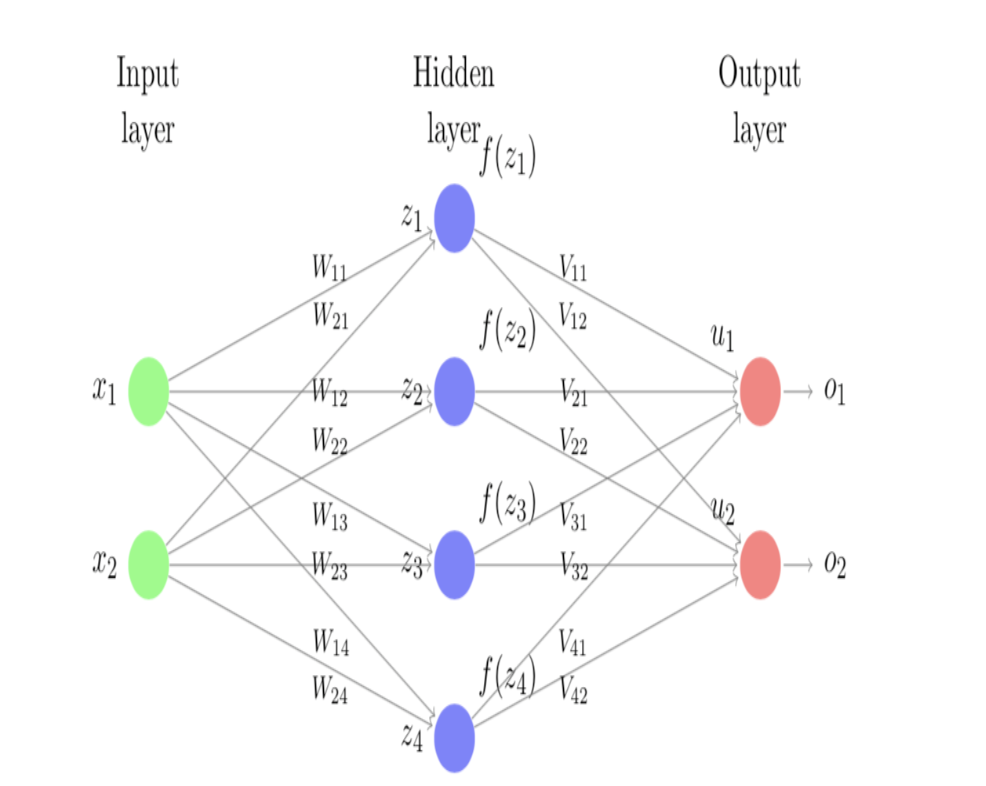

**Computation Steps**

Below, determine the given values by hand using the weights and input $X$.

- $z_1$
- $z_2$


In [2]:
W = np.array([[1, 0, -1],
          [0, 1, -1],
          [-1, 0, -1],
          [0, -1, -1]])

In [3]:
V = np.array([[1, 1, 1, 1, 0],
              [-1, -1, -1, -1, 2]])

In [27]:
X = np.array([ [3], [14], [1]])

In [9]:
z1 = W[0][0]*X[0] + W[0][1]*X[1] + W[0][2]
z1

array([2])

In [11]:
z2 = W[0][1]*X[0] + W[1][1]*X[1] + W[1][2]
z2

array([13])

In [22]:
X = np.append(X, [1])

In [23]:
X

array([ 3, 14,  1])

In [29]:
Z = np.dot(W, X)
Z

array([[  2],
       [ 13],
       [ -4],
       [-15]])

In [25]:
W@X

array([  2,  13,  -4, -15])

**Activation**

- ReLU - linear
- Softmax - multiclass classification
- Sigmoid - binary classification

In [26]:
def relu(x):
  return np.where(x < 0, 0, x)

In [ ]:
def softmax(x):
  return e^x

- $f(z_1)$

In [47]:
f = relu(Z)
f

array([[ 2],
       [13],
       [ 0],
       [ 0]])

In [34]:
V.shape

(2, 5)

In [37]:
f.shape

(4, 1)

In [48]:
f = np.append(f, 1)

In [49]:
u = V@f

In [50]:
u

array([ 15, -13])

#### Using Linear Algebra

Now, use the activation functions to perform the complete forward pass on `X` using `numpy` and matrix operations.

#### Forward Pass: Example

In [ ]:
W2 = np.random.randint(low = -1, high = 5, size = W.shape)

In [ ]:
W2

In [ ]:
V2 = np.random.randint(low = -5, high = 5, size = V.shape)
V2

#### Regression with `pytorch`

In [51]:
X = torch.randn(100, 1)*10
y = X + torch.randn(100, 1)*2.5

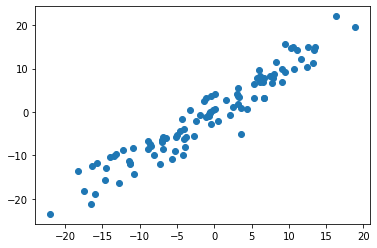

In [52]:
plt.scatter(X, y)

In [53]:
model = nn.Linear(in_features = 1, out_features = 1)

In [54]:
print(model.bias, model.weight)

Parameter containing:
tensor([0.7928], requires_grad=True) Parameter containing:
tensor([[0.3782]], requires_grad=True)


In [55]:
x = torch.tensor([5.0])

In [56]:
model(x)

tensor([2.6837], grad_fn=<AddBackward0>)

In [98]:
class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    return self.linear(x)

In [58]:
lr = LinearRegression(2, 1)

In [59]:
list(lr.parameters())

[Parameter containing:
 tensor([[ 0.5796, -0.6932]], requires_grad=True), Parameter containing:
 tensor([0.4407], requires_grad=True)]

In [60]:
x = torch.tensor([[3.2, 1.1]])

In [61]:
lr.forward(x)

tensor([[1.5331]], grad_fn=<AddmmBackward0>)

In [ ]:
lr = LinearRegression(1, 1) # model

In [62]:
criterion = nn.MSELoss() # loss

In [63]:
X =( X - X.mean() )/ X.std()

In [64]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # optimizer

In [65]:
epochs = 100
losses = []
for i in range(epochs):
  yhat = model.forward(X)
  loss = criterion(yhat, y)
  if i%10 == 0:
    print(f'Epoch {i}, loss {loss.item()}')
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0, loss 88.04419708251953
Epoch 10, loss 61.41572570800781
Epoch 20, loss 43.5678596496582
Epoch 30, loss 31.605241775512695
Epoch 40, loss 23.587228775024414
Epoch 50, loss 18.21310806274414
Epoch 60, loss 14.611071586608887
Epoch 70, loss 12.196782112121582
Epoch 80, loss 10.578587532043457
Epoch 90, loss 9.49398422241211


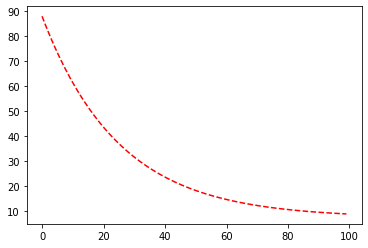

In [66]:
#plot the losses
plt.plot(range(epochs), [i.detach().numpy() for i in losses], '--r')

In [67]:
w, b = model.parameters()

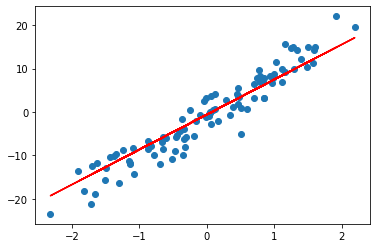

In [68]:
plt.scatter(X, y)
plt.plot(X, w.detach()*X + b.detach(), '-r')

**PROBLEM**



In [99]:
from sklearn.datasets import load_diabetes

In [70]:
diabetes = load_diabetes(as_frame = True)

In [71]:
diabetes.frame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [104]:
diabetes.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [100]:
X = torch.tensor(diabetes.data.values)
y = torch.tensor(diabetes.target.values)

In [105]:
X = X.to(torch.float32)
y = y.to(torch.float32)

In [101]:
X.shape

torch.Size([442, 10])

In [102]:
y.shape

torch.Size([442])

In [103]:
X.shape[1]

10

1. Setup New Regression model for diabetes data using `pytorch`
2. Use training loop to train model
3. What are parameters of the model?
4. What is the mean squared error of the predictions?  Is this a good model?

In [106]:
model = LinearRegression(10, 1) # model

In [80]:
type(X)

torch.Tensor

In [84]:
type(y)

torch.Tensor

In [85]:
y.shape

torch.Size([442])

In [110]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # optimizer

In [111]:
epochs = 100
losses = []
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # optimizer
for i in range(epochs):
  yhat = model.forward(X)
  loss = criterion(yhat, y)
  if i%10 == 0:
    print(f'Epoch {i}, loss {loss.item()}')
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0, loss 29088.8671875
Epoch 10, loss 21391.009765625
Epoch 20, loss 16251.853515625
Epoch 30, loss 12820.9150390625
Epoch 40, loss 10530.390625
Epoch 50, loss 9001.220703125
Epoch 60, loss 7980.333984375
Epoch 70, loss 7298.779296875
Epoch 80, loss 6843.76953125
Epoch 90, loss 6540.001953125


In [114]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2506,  0.2386, -0.0018,  0.0043, -0.1580,  0.0807, -0.0341, -0.1839,
          -0.1829,  0.2864]], requires_grad=True), Parameter containing:
 tensor([131.9513], requires_grad=True)]

### Classification Example

In [132]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

In [136]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [116]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
X = sscaler.fit_transform(X)

In [117]:
X.shape

(569, 30)

In [119]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(30, 32)
        self.layer_2 = nn.Linear(32,20)
        self.layer_out = nn.Linear(20, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, X):
        x = self.relu(self.layer_1(X))
        x = self.relu(self.layer_2(x))
        x = self.layer_out(x)
        x = self.sigmoid(x)
        return x

In [120]:
model = Classifier()

In [121]:
X = torch.from_numpy(X)
y = torch.from_numpy(y.reshape(-1, 1))
X = X.float()
y = y.float()

In [122]:
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, y_train):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(x_train)
        loss_train = loss_fn(t_p_train, y_train)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(epoch, loss_train.item())

In [123]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [124]:
training_loop(n_epochs=5000, optimizer=optimizer, model = model, loss_fn=nn.BCELoss(),
             x_train=X, y_train=y)

1 0.6787260174751282
1000 0.6074641346931458
2000 0.5062144994735718
3000 0.3662306070327759
4000 0.2509343922138214
5000 0.18427209556102753


In [ ]:
model(X)

In [126]:
preds = np.where(model(X) > 0.6, 1, 0)

In [127]:
from sklearn.metrics import confusion_matrix, classification_report

In [128]:
confusion_matrix(y, preds)

array([[195,  17],
       [  9, 348]])

In [129]:
print(classification_report(y, preds))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       212
         1.0       0.95      0.97      0.96       357

    accuracy                           0.95       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.95      0.95      0.95       569



In [130]:
np.unique(y, return_counts = True)

(array([0., 1.], dtype=float32), array([212, 357]))

In [138]:
(192)/(192 + 20)

0.9056603773584906

In [139]:
357/(357 + 212)

0.6274165202108963

In [140]:
(192 + 353)/(192 + 353 + 4 + 20)

0.9578207381370826

#### Classification Problem 

Below a dataset for multi-class classification is provided.  Setup and build a classification model using `pytorch`.  Train and evaluate the model, discuss the results.

In [141]:
from sklearn.datasets import load_wine

In [142]:
wine = load_wine(as_frame = True)

In [143]:
wine.frame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [173]:
X = wine.data
y = wine.target

In [145]:
X.shape

(178, 13)

In [146]:
y.shape

(178,)

In [150]:
np.unique(y, return_counts = True)

(array([0, 1, 2]), array([59, 71, 48]))

In [151]:
class MultiClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(13, 13)
        self.layer_2 = nn.Linear(13, 7)
        self.layer_out = nn.Linear(7, 3)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()
        
    def forward(self, X):
        x = self.relu(self.layer_1(X))
        x = self.relu(self.layer_2(x))
        x = self.layer_out(x)
        x = self.softmax(x)
        return x

In [176]:
model = MultiClassifier()

In [174]:
X = torch.tensor(X.values)
y = torch.tensor(y.values)
X = X.float()
y = y.long()

In [177]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [178]:
training_loop(n_epochs=5000, optimizer=optimizer, model = model, loss_fn=nn.CrossEntropyLoss(),x_train=X, y_train=y)

<ipython-input-151-56e47e495c41>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


1 1.1646169424057007
1000 0.867270290851593
2000 0.8510277271270752
3000 0.8442544937133789
4000 0.8401064872741699
5000 0.8369181752204895


In [181]:
preds = model(X)

<ipython-input-151-56e47e495c41>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


In [190]:
preds = model(X).argmax(axis=1)
preds

<ipython-input-151-56e47e495c41>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


tensor([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1,
        1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2,
        1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1,
        2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
        2, 1, 1, 1, 2, 2, 2, 2, 2, 1])

In [191]:
confusion_matrix(y, preds)

array([[51,  0,  8],
       [ 2, 46, 23],
       [ 2, 21, 25]])

In [192]:
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        59
           1       0.69      0.65      0.67        71
           2       0.45      0.52      0.48        48

    accuracy                           0.69       178
   macro avg       0.69      0.68      0.68       178
weighted avg       0.70      0.69      0.69       178

